In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/data_science_job.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [8]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [9]:
df.shape

(19158, 13)

In [12]:
cols=[var for var in df.columns if df[var].isnull().mean()*100<5]
cols

['enrollee_id',
 'city',
 'city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

In [15]:
len(cols)

9

In [17]:
cols=[var for var in df.columns if df[var].isnull().mean()*100<5 and df[var].isnull().mean()*100>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [18]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
4143,0.926,no_enrollment,Graduate,20.0,8.0
13565,0.754,no_enrollment,Graduate,3.0,21.0
17294,0.624,Full time course,Graduate,4.0,10.0
13957,0.624,no_enrollment,Masters,16.0,146.0
18582,0.920,no_enrollment,Phd,10.0,10.0


In [19]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [38]:
(df[cols].dropna()).shape

(17182, 5)

In [25]:
len(df)

19158

In [28]:
#Ratio of rows remaining (after removing rows with null values in selected cols) to actual df
len(df[cols].dropna())/len(df)

0.8968577095730244

In [29]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

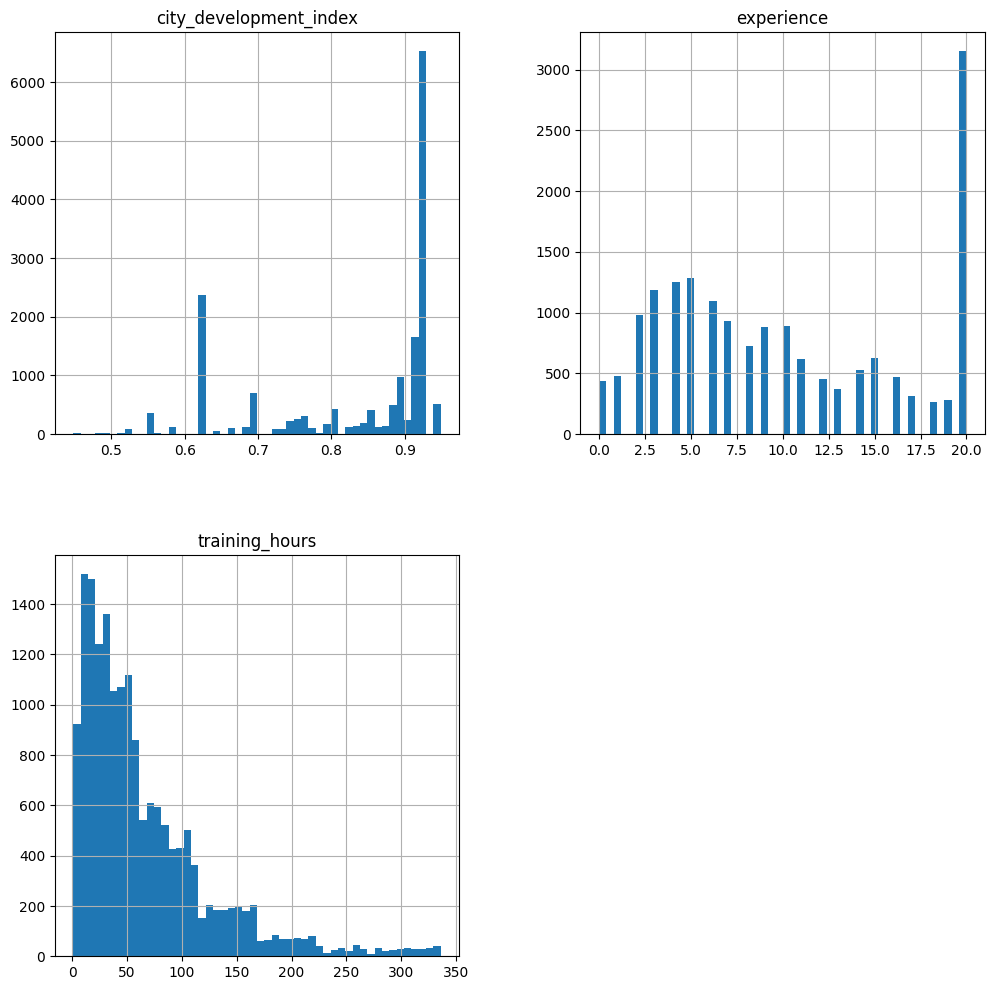

In [51]:
new_df.hist(bins=50,figsize=(12,12))
plt.show()
# It displays only numerical cols leaving categorical cols

## Comparing training hours in original data and null values removed data(selected cols)

<Axes: >

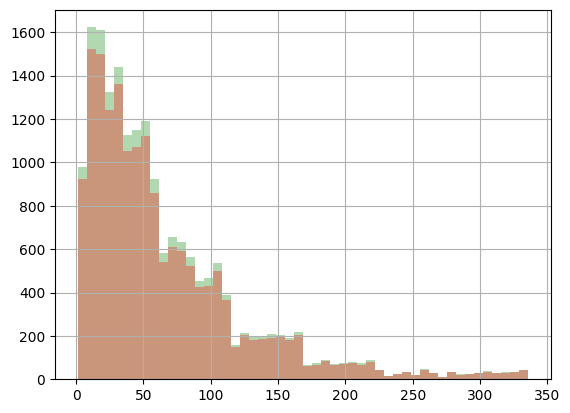

In [55]:
fig=plt.figure()
ax=fig.add_subplot(111)
#Before cca
df['training_hours'].hist(bins=50,ax=ax,color='green',alpha=0.3,)
#After cca
new_df['training_hours'].hist(bins=50,ax=ax,color='red',alpha=0.3)

<Axes: ylabel='Density'>

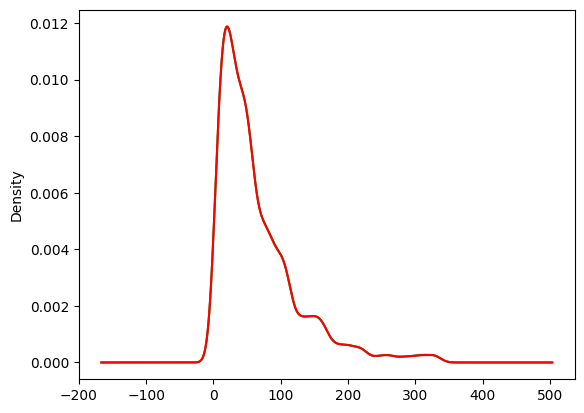

In [53]:
fig=plt.figure()
ax=fig.add_subplot(111)
#Data before cca
df['training_hours'].plot(kind='kde',ax=ax,color='green')
#Data after cca
new_df['training_hours'].plot(kind='kde',ax=ax,color='red')

<Axes: >

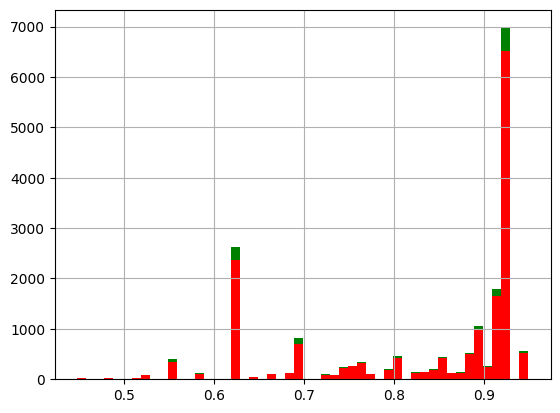

In [57]:
fig=plt.figure()
ax=fig.add_subplot(111)
#Data before cca (Original)
df['city_development_index'].hist(bins=50,ax=ax,color='green')
#Data after cca
new_df['city_development_index'].hist(bins=50,ax=ax,color='red')

<Axes: ylabel='Density'>

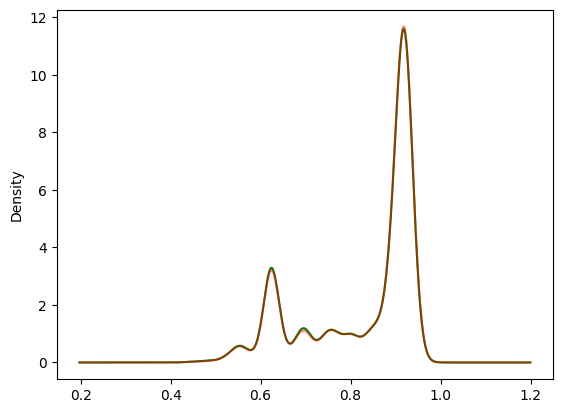

In [62]:
fig=plt.figure()
ax=fig.add_subplot(111)
#Data before cca
df['city_development_index'].plot(kind='kde',ax=ax,color='green',alpha=1)
#Data after cca
new_df['city_development_index'].plot(kind='kde',ax=ax,color='red',alpha=0.5)

<Axes: >

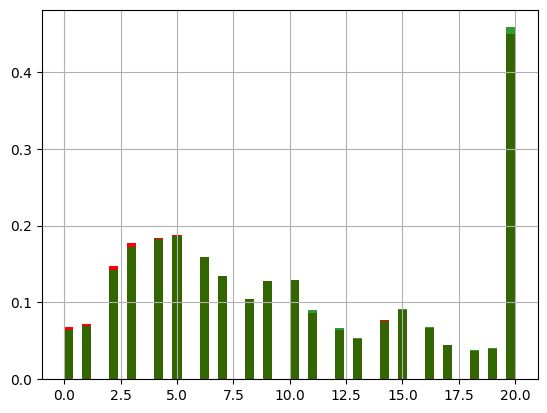

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

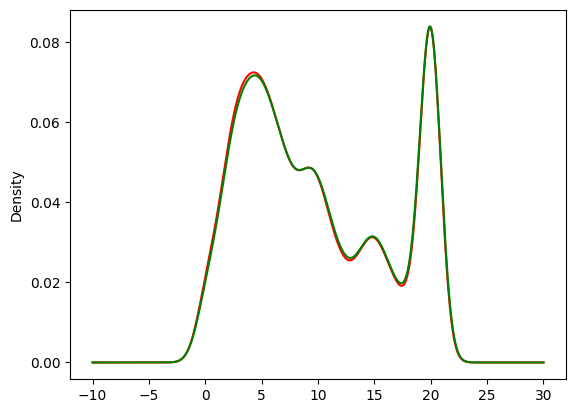

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [72]:
#It gives how much percent of graduates, masters,high school,phd, primary school
temp=pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),
    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1,keys=['Original','CCA'])
#temp.columns=['Original','CCA']
temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [71]:
temp=pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts()/len(df),
    # percentage of observations per category, cca data
    new_df['education_level'].value_counts()/len(new_df)
],axis=1,keys=['Original','CCA'])
temp

,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
